In [20]:
import pandas as pd

loading data in the notebook

In [21]:
data=pd.read_csv('breast-cancer-wisconsin.data',header='infer')

In [22]:
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


adding the attribute names

In [23]:
data.columns=['sample code','clump thickness','Uniformity of cell size',
              'uniformity of cell shape','maginal adhesion',
              'singleepithelial cell size','bare nuclei',
              'bland chromatin','narmal nucleoli','mitoses','class']

In [24]:
data.head()

,sample code,clump thickness,Uniformity of cell size,uniformity of cell shape,maginal adhesion,singleepithelial cell size,bare nuclei,bland chromatin,narmal nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [25]:
data = data.drop(['sample code'],axis=1)

let us see if the sample codes have been droped

In [26]:
data.head()

,clump thickness,Uniformity of cell size,uniformity of cell shape,maginal adhesion,singleepithelial cell size,bare nuclei,bland chromatin,narmal nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


now the next part is to checkthe number of instances or elements in the dataset

In [27]:
print('number of instances=%d'%(data.shape[0]))
print('number of attributes=%d'%(data.shape[1]))

number of instances=698
number of attributes=10


# finding the missing values

In [28]:
import numpy as np
data=data.replace('?',np.NaN)

In [29]:
print('number of instances=%d'%(data.shape[0]))
print('number of attributes=%d'%(data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d'%(col,data[col].isna().sum()))

number of instances=698
number of attributes=10
Number of missing values:
	clump thickness: 0
	Uniformity of cell size: 0
	uniformity of cell shape: 0
	maginal adhesion: 0
	singleepithelial cell size: 0
	bare nuclei: 16
	bland chromatin: 0
	narmal nucleoli: 0
	mitoses: 0
	class: 0


from the out put, we can observe that the Bare nuclei column contains 16 missing values. in the code below, we are going to replace the messing values by the median value of the same column.

In [30]:
data2=data['bare nuclei']
print('before replacing missing values')
print(data2[20:25])
data2=data.fillna(data2.median())
print('after replacing missing values')
print(data2[20:25])

before replacing missing values
20      7
21      1
22    NaN
23      1
24      7
Name: bare nuclei, dtype: object
after replacing missing values
    clump thickness  Uniformity of cell size  uniformity of cell shape  \
20               10                        5                         5   
21                3                        1                         1   
22                8                        4                         5   
23                1                        1                         1   
24                5                        2                         3   

    maginal adhesion  singleepithelial cell size bare nuclei  bland chromatin  \
20                 3                           6           7                7   
21                 1                           2           1                2   
22                 1                           2         1.0                7   
23                 1                           2           1                3   
24  

the second method is to remove the missing values

In [31]:
print('number of rows in the original data=%d'%(data.shape[0]))
data2=data.dropna()
print('number of rows ofter removing missing values=%d'%data2.shape[0])

number of rows in the original data=698
number of rows ofter removing missing values=682


# outliers

outliers are the dtapoints that are considerably not same as the data set elements

<AxesSubplot:>

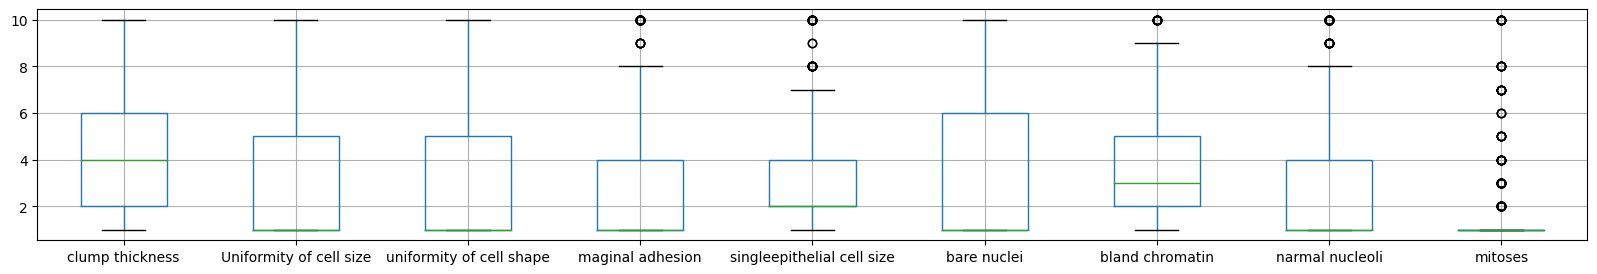

In [32]:
%matplotlib inline
data2=data.drop(['class'],axis=1)
data2['bare nuclei']=pd.to_numeric(data2['bare nuclei'])
data2.boxplot(figsize=(20,3))


checking for the duplication

In [33]:
dups=data.duplicated()
print('number of duplicate rows=%d'%(dups.sum()))

number of duplicate rows=235


# Aggregation

data aggregation is the preprocessing task where the values of two or more objects are combined into a single object

In [34]:
daily=pd.read_csv('./DTW_prec.csv',header='infer')

In [35]:
daily.head()

,DATE,PRCP
0,1/1/2001,0.00
1,1/2/2001,0.00
2,1/3/2001,0.00
3,1/4/2001,0.04
4,1/5/2001,0.14


Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

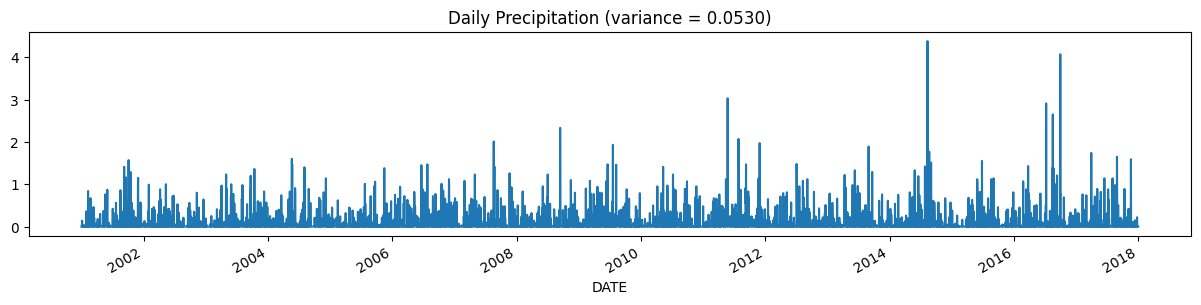

In [36]:
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))



Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

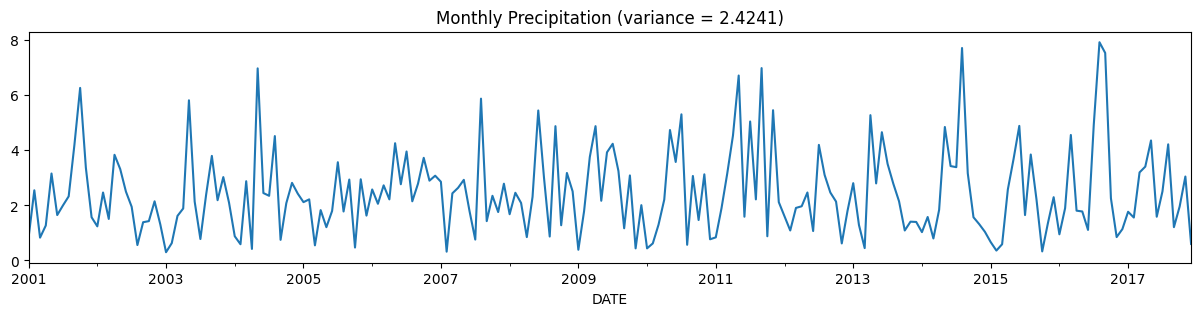

In [37]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

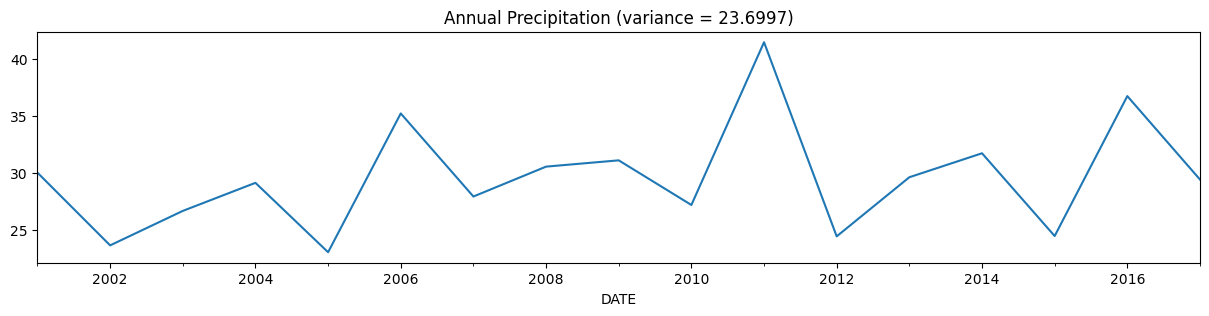

In [38]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))